In [3]:
!nvidia-smi

Fri Feb 26 08:29:35 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.39       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    29W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install mxnet-cu101
!pip install gluoncv

In [ ]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import glob
import cv2
from tqdm.notebook import tqdm
import numpy as np
 
import mxnet as mx
from mxnet import nd
from gluoncv import utils
from gluoncv.data import LstDetection
import gluoncv
from mxnet import autograd, gluon
print("Number of GPUs : ",mx.context.num_gpus())

Number of GPUs :  1


In [ ]:
DATA_PATH = "/content/drive/MyDrive/Wheat_detection_1/Data"
TRAIN_PATH = DATA_PATH+str("/train_img")
TEST_PATH = DATA_PATH+str("/test_img")
ANN_FILE = DATA_PATH+str("/train.csv")
 
BATCH_SIZE = 15
EPOCHS = 3
CLASS_NAMES = ['Wheat']
 
DEVICE = mx.gpu(0)

In [ ]:
df = pd.read_csv(ANN_FILE)
df.head(5)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(ANN_FILE)
df["image_id"] = df["image_id"].apply(lambda x: str(x) + ".jpg")
df["image_id"] = df["image_id"].astype("str")
df.head(5)

In [ ]:
df['bbox'] = df['bbox'].apply(lambda x: x[1:-1].split(","))

def string_to_float(arr):
  arr= np.array([float(string) for string in arr])
  return arr


df['bbox'] = df['bbox'].apply(lambda x: string_to_float(x))

In [ ]:
csv_bboxes = df['bbox'].to_numpy()
csv_image_ids = df['image_id'].to_numpy()

In [ ]:
def get_boxes(image_name,csv_image_ids,csv_bboxes ):

  indexes = np.where(csv_image_ids==image_name)[0]
  if len(indexes)==0:
    raise ValueError("No data for ",image_name)
  boxes=[]
  for ind in indexes:
    x,y,w,h = csv_bboxes[ind]
    boxes.append(np.array([x,y,x+w,y+h]))
  boxes = np.array(boxes)

  return boxes
"""
####Testing####
img_loc = TRAIN_PATH+"/901e23e9b.jpg"
img = mx.image.imread(img_loc)
print("Image shape: ",img.shape)
boxes = get_boxes("901e23e9b.jpg",csv_image_ids,csv_bboxes )

plt.rcParams['figure.figsize'] = [8, 8]
ax = utils.viz.plot_bbox(img, boxes, class_names=CLASS_NAMES,absolute_coordinates=True,linewidth=0.5,fontsize=5)
plt.show()
"""

'\n####Testing####\nimg_loc = TRAIN_PATH+"/901e23e9b.jpg"\nimg = mx.image.imread(img_loc)\nprint("Image shape: ",img.shape)\nboxes = get_boxes("901e23e9b.jpg",csv_image_ids,csv_bboxes )\n\nplt.rcParams[\'figure.figsize\'] = [8, 8]\nax = utils.viz.plot_bbox(img, boxes, class_names=CLASS_NAMES,absolute_coordinates=True,linewidth=0.5,fontsize=5)\nplt.show()\n'

In [ ]:
def write_line(img_path, im_shape, boxes, ids, idx):
    h, w, c = im_shape
    
    # for header, we use minimal length 2, plus width and height
    # with A: 4, B: 5, C: width, D: height
    A = 4
    B = 5
    C = w
    D = h
    # concat id and bboxes
    labels = np.hstack((ids.reshape(-1, 1), boxes)).astype('float')

    # normalized bboxes (recommanded)
    labels[:, (1, 3)] /= float(w)
    labels[:, (2, 4)] /= float(h)
    # flatten
    labels = labels.flatten().tolist()
    str_idx = [str(idx)]
    str_header = [str(x) for x in [A, B, C, D]]
    str_labels = [str(x) for x in labels]
    str_path = [img_path]
    line = '\t'.join(str_idx + str_header + str_labels + str_path) + '\n'
    return line

In [ ]:
file_lst = open('train.lst', 'w')


i=0
for file_name in os.listdir(TRAIN_PATH):
  try:
    boxes = get_boxes(file_name,csv_image_ids,csv_bboxes)
    file_path = TRAIN_PATH+'/'+file_name

    line = write_line(file_path, (1024,1024,3), boxes, np.zeros(boxes.shape[0]), i)
    file_lst.write(line)
    i=i+1
  except:
    print("No bbox data for image:",file_name)


file_lst.close()
  



No bbox data for image: dec23c826.jpg
No bbox data for image: 8de789df8.jpg
No bbox data for image: f9cafa47f.jpg
No bbox data for image: f2a6804d2.jpg
No bbox data for image: ffbb9c623.jpg
No bbox data for image: 91f19054e (1).jpg
No bbox data for image: a3ce975cd.jpg
No bbox data for image: de2a3cf37.jpg
No bbox data for image: 0cf7ef43d.jpg
No bbox data for image: 91d4e3750.jpg
No bbox data for image: 6584c18c0.jpg
No bbox data for image: 155c440e8.jpg
No bbox data for image: 83a94fc79.jpg
No bbox data for image: e01ad95cf.jpg
No bbox data for image: 46c6a747a.jpg
No bbox data for image: 49e40c7a4.jpg
No bbox data for image: 901ee2848 (1).jpg
No bbox data for image: ec196d18a.jpg
No bbox data for image: 45fddc611.jpg
No bbox data for image: 5901a73fe.jpg
No bbox data for image: ccb3892c1.jpg
No bbox data for image: dd5d2fa9e.jpg
No bbox data for image: 581eaf87b.jpg
No bbox data for image: 952e7d15c.jpg
No bbox data for image: 90a4c6bf9 (1).jpg
No bbox data for image: 69352f3fa.jpg


length: 3373
image shape: (1024, 1024, 3)
Label example:
[[ 994.  275. 1024.  350.    0.]
 [ 896.    0. 1013.   47.    0.]
 [ 731.    0.  815.   77.    0.]
 [ 750.  175.  845.  243.    0.]
 [ 815.  124.  900.  185.    0.]
 [ 893.  262.  986.  348.    0.]
 [ 735.  343.  833.  482.    0.]
 [ 678.  389.  770.  467.    0.]
 [ 908.  378.  989.  471.    0.]
 [ 561.   49.  639.  153.    0.]
 [ 636.  216.  722.  307.    0.]
 [ 485.    0.  557.   71.    0.]
 [  53.    0.  131.   48.    0.]
 [ 268.   60.  336.  116.    0.]
 [ 369.    3.  433.   54.    0.]
 [ 413.   88.  479.  133.    0.]
 [ 384.   51.  443.   91.    0.]
 [ 260.  154.  346.  223.    0.]
 [ 284.  231.  357.  290.    0.]
 [ 387.  210.  467.  265.    0.]
 [ 334.  153.  418.  273.    0.]
 [ 365.  291.  482.  406.    0.]
 [ 512.  277.  574.  373.    0.]
 [ 565.  275.  621.  366.    0.]
 [ 434.  407.  509.  482.    0.]
 [ 505.  478.  627.  552.    0.]
 [ 651.  550.  735.  620.    0.]
 [ 372.  492.  452.  552.    0.]
 [  41.  522.  187.

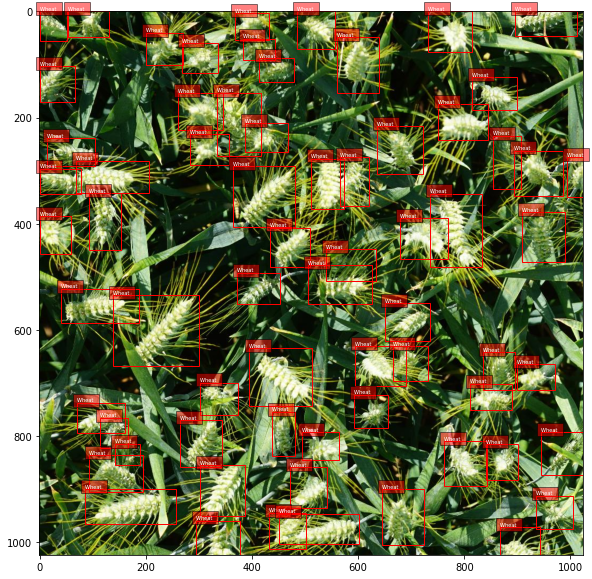

In [ ]:
train_dataset = LstDetection('train.lst', root=os.path.expanduser('.') )
print('length:', len(train_dataset))
first_data = train_dataset[1]
img,label = first_data
print('image shape:', img.shape)
print('Label example:')
print(label)

plt.rcParams["figure.figsize"] = (10,10)
ax = utils.viz.plot_bbox(img, label[:,0:4], class_names=CLASS_NAMES,absolute_coordinates=True,linewidth=1,fontsize=5)
plt.show()

In [ ]:
net = gluoncv.model_zoo.get_model('ssd_512_mobilenet1.0_voc', pretrained=True)

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [ ]:
net.reset_class(CLASS_NAMES)

In [ ]:
net = gluoncv.model_zoo.get_model('ssd_512_mobilenet1.0_custom', classes=CLASS_NAMES,
    pretrained_base=False, transfer='voc')

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


In [ ]:
def get_dataloader(net, train_dataset, data_shape, batch_size, num_workers):
    from gluoncv.data.batchify import Tuple, Stack, Pad
    from gluoncv.data.transforms.presets.ssd import SSDDefaultTrainTransform
    width, height = data_shape, data_shape
    # use fake data to generate fixed anchors for target generation
    with autograd.train_mode():
        _, _, anchors = net(mx.nd.zeros((1, 3, height, width)))
    batchify_fn = Tuple(Stack(), Stack(), Stack())  # stack image, cls_targets, box_targets
    train_loader = gluon.data.DataLoader(
        train_dataset.transform(SSDDefaultTrainTransform(width, height, anchors)),
        batch_size, True, batchify_fn=batchify_fn, last_batch='rollover', num_workers=num_workers)
    return train_loader

train_data = get_dataloader(net, train_dataset, 512, BATCH_SIZE, 0)

In [ ]:
import time
net.collect_params().reset_ctx(DEVICE)
trainer = gluon.Trainer(
    net.collect_params(), 'sgd',
    {'learning_rate': 0.001, 'wd': 0.0005, 'momentum': 0.9},)

mbox_loss = gluoncv.loss.SSDMultiBoxLoss()
ce_metric = mx.metric.Loss('CrossEntropy')
smoothl1_metric = mx.metric.Loss('SmoothL1')

for epoch in range(EPOCHS):
    ce_metric.reset()
    smoothl1_metric.reset()
    tic = time.time()
    btic = time.time()
    net.hybridize(static_alloc=True, static_shape=True)
    for i, batch in enumerate(train_data):
        batch_size = batch[0].shape[0]
        data = gluon.utils.split_and_load(batch[0], ctx_list=[DEVICE], batch_axis=0)
        cls_targets = gluon.utils.split_and_load(batch[1], ctx_list=[DEVICE], batch_axis=0)
        box_targets = gluon.utils.split_and_load(batch[2], ctx_list=[DEVICE], batch_axis=0)
        with autograd.record():
            cls_preds = []
            box_preds = []
            for x in data:
                cls_pred, box_pred, _ = net(x)
                cls_preds.append(cls_pred)
                box_preds.append(box_pred)
            sum_loss, cls_loss, box_loss = mbox_loss(
                cls_preds, box_preds, cls_targets, box_targets)
            autograd.backward(sum_loss)
        # since we have already normalized the loss, we don't want to normalize
        # by batch-size anymore
        trainer.step(1)
        ce_metric.update(0, [l * batch_size for l in cls_loss])
        smoothl1_metric.update(0, [l * batch_size for l in box_loss])
        name1, loss1 = ce_metric.get()
        name2, loss2 = smoothl1_metric.get()
        if i % 10 == 0:
            print('[Epoch {}][Batch {}], Speed: {:.3f} samples/sec, {}={:.3f}, {}={:.3f}'.format(
                epoch, i, batch_size/(time.time()-btic), name1, loss1, name2, loss2))
        btic = time.time()

[Epoch 0][Batch 0], Speed: 1.034 samples/sec, CrossEntropy=4.318, SmoothL1=4.608
[Epoch 0][Batch 10], Speed: 1.165 samples/sec, CrossEntropy=3.465, SmoothL1=3.725
[Epoch 0][Batch 20], Speed: 1.090 samples/sec, CrossEntropy=3.055, SmoothL1=3.466
[Epoch 0][Batch 30], Speed: 1.168 samples/sec, CrossEntropy=2.854, SmoothL1=3.233


In [ ]:
net.save_parameters('ssd_512_mobilenet1.0_wheat.params')

/usr/local/lib/python3.6/dist-packages/mxnet/gluon/block.py:1512: UserWarning: Cannot decide type for the following arguments. Consider providing them as input:
	data: None
  input_sym_arg_type = in_param.infer_type()[0]


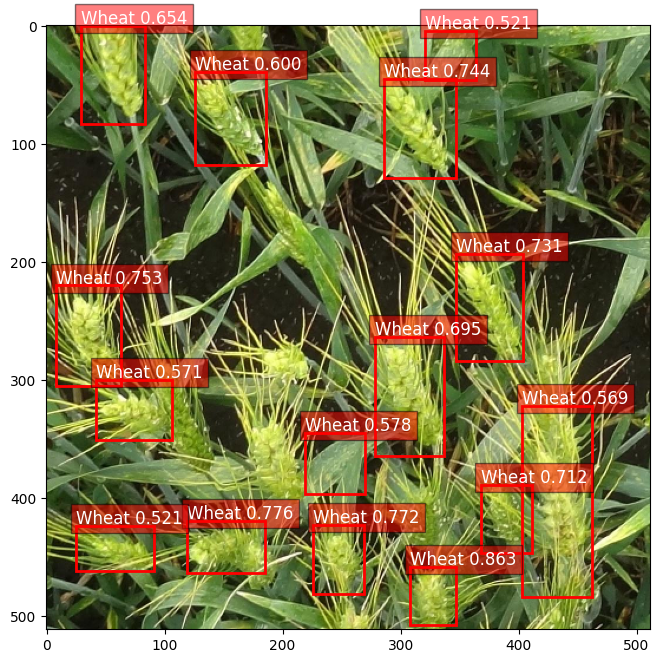

In [ ]:
net = gluoncv.model_zoo.get_model('ssd_512_mobilenet1.0_custom', classes=CLASS_NAMES, pretrained_base=False)
net.load_parameters('ssd_512_mobilenet1.0_wheat.params')

x, image = gluoncv.data.transforms.presets.ssd.load_test("/content/drive/MyDrive/Wheat_detection/Data/test_img/aac893a91.jpg", 512,)
cid, score, bbox = net(x)
ax = utils.viz.plot_bbox(image, bbox[0], score[0], cid[0], class_names=CLASS_NAMES,linewidth=2)
plt.show()

In [ ]:
!python im2rec.py train.lst TRAIN_PATH --pass-through --pack-label

Creating .rec file from /content/train.lst in /content
multiprocessing not available, fall back to single threaded encoding
time: 0.0026454925537109375  count: 0
time: 1.6443994045257568  count: 1000
time: 1.8298735618591309  count: 2000
time: 1.8457980155944824  count: 3000


In [ ]:
from gluoncv.data import RecordFileDetection
train_data = RecordFileDetection('train.rec', coord_normalized=True)


In [ ]:
from google.colab import files